In [358]:
#!pip install jupyterlab-hide-code
#!pip install --upgrade jupyterlab

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact, widgets

Importing the data

In [360]:
fao_data = pd.read_csv("DATA/clean_fao_informaton.csv")

In [361]:
fao_data.head()

,country,cpc_code,commodity,year,loss_percentage,food_supply_stage,group,description,activity_1,activity_2,cause_loss_1,cause_loss_2
0,Myanmar,23161.02,"Rice, milled",2015,1.78,Storage,231,Grain mill products,Storage,NaN,NaN,NaN
1,Myanmar,23161.02,"Rice, milled",2015,11.77,Storage,231,Grain mill products,Storage,NaN,NaN,NaN
2,Myanmar,23161.02,"Rice, milled",2015,5.88,Storage,231,Grain mill products,Storage,NaN,NaN,NaN
3,Myanmar,23161.02,"Rice, milled",2015,3.57,Storage,231,Grain mill products,Storage,NaN,NaN,NaN
4,Myanmar,23161.02,"Rice, milled",2015,17.65,Storage,231,Grain mill products,Storage,NaN,NaN,NaN


# <u> 1- WHERE:
The primary objective is to observe the distribution of food loss across different countries. Specifically:

1- Firstly, verify the number of food groups studied in different countries

2- How countries analyzed the different food groups classification through the years

3- Food loss by food group.

### <u> 1.1- Visualize how many times each group of food has been analized by the different countries through the years

country_food_group = dataframe containing information regardin the country, year quantity of food groups analized and average loss percentaje per country and year.

In [362]:
country_food_group = fao_data.groupby(['country', 'year']).agg(num_groups=('group', 'count'), mean_loss_percentage=('loss_percentage', 'mean')).reset_index()

In [363]:
country_food_group

,country,year,num_groups,mean_loss_percentage
0,Algeria,2005,1,25.000000
1,Angola,2000,33,2.518395
2,Angola,2001,33,2.531599
3,Angola,2002,33,2.534783
4,Angola,2003,33,2.528430
...,...,...,...,...
1103,Zimbabwe,2017,20,2.779971
1104,Zimbabwe,2018,90,4.519720
1105,Zimbabwe,2019,20,2.756332
1106,Zimbabwe,2020,20,2.581415


Quantity of data we have for each column:

In [364]:
print (f" years = {len(country_food_group.year.unique())} \n"
      f" country = {len(country_food_group.country.unique())} \n"
      f" num_groups = {len(country_food_group.num_groups.unique())} \n")

 years = 23 
 country = 111 
 num_groups = 76 



as there are many years, for visualization we will just display the last 6 years

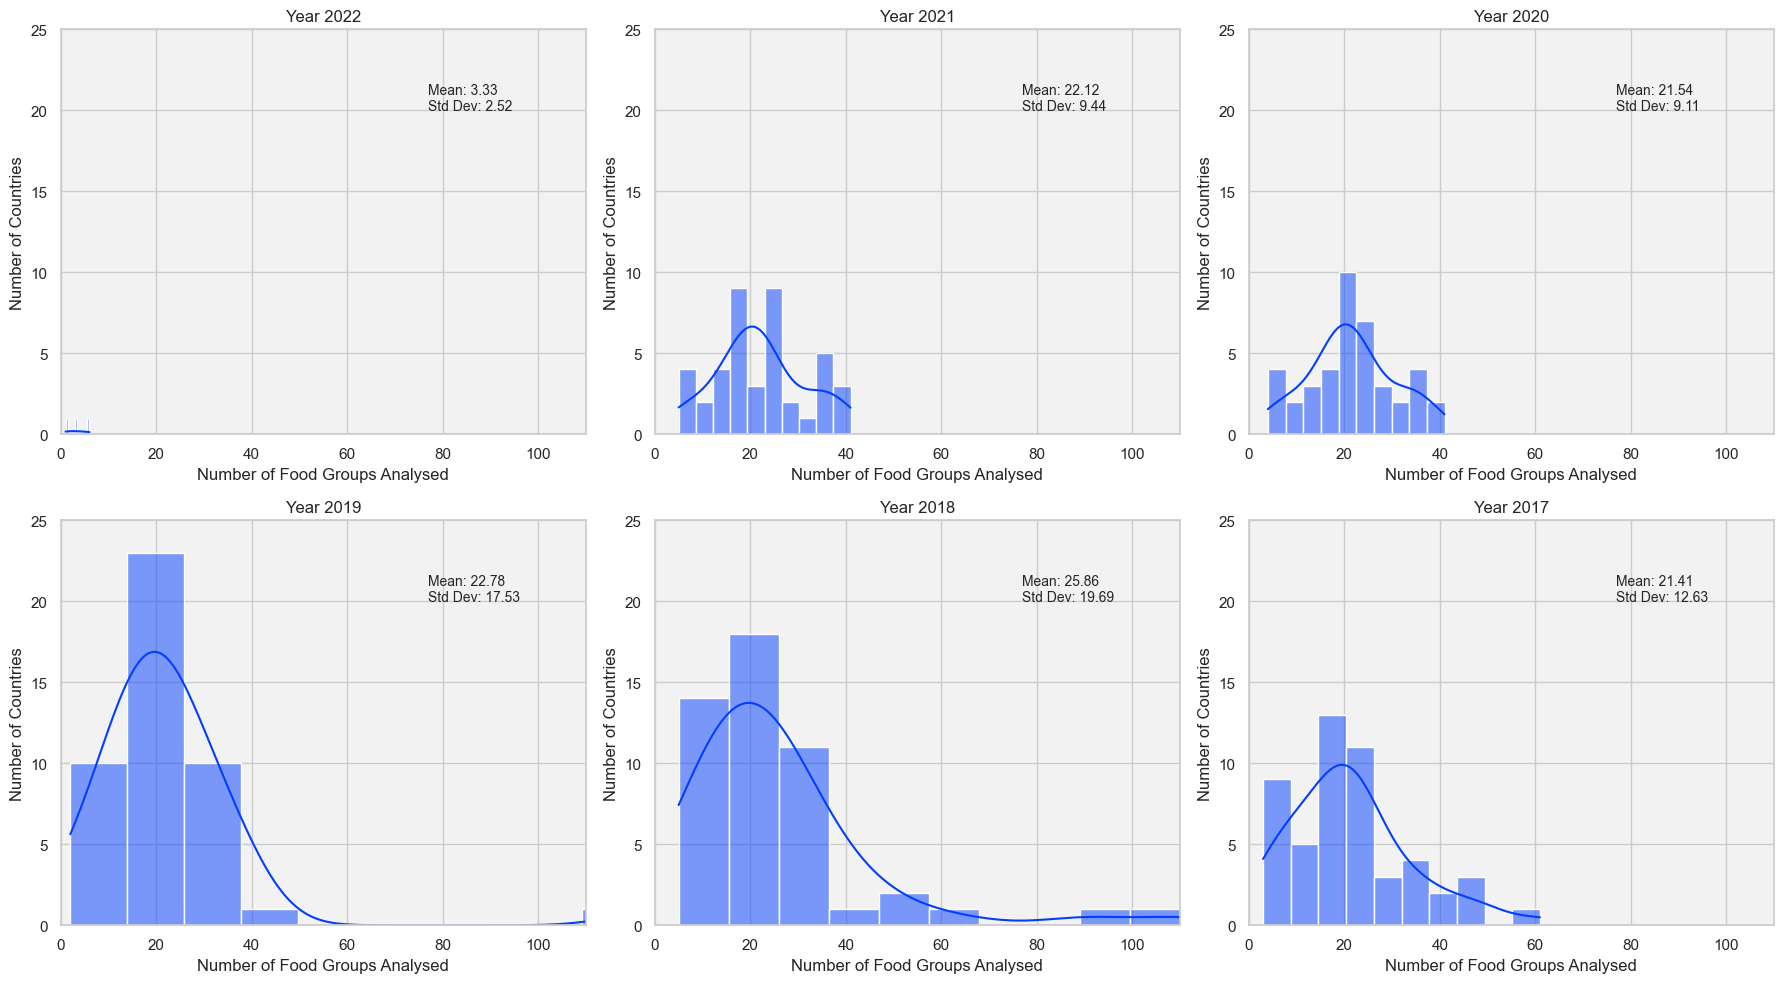

In [365]:
filtered_data = country_food_group[country_food_group['year'] <= 2022]
unique_years = filtered_data['year'].unique()
unique_years = sorted(unique_years, reverse=True)

# Determine the number of subplots needed based on the number of unique years
num_subplots = min(len(unique_years), 6)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes for easy indexing
axes = axes.flatten()

# Iterate over unique years and create histograms
for i, year in enumerate(unique_years[:num_subplots]):
    # Filter data for the current year
    year_data = filtered_data[filtered_data['year'] == year]
    
    # Plot histogram
    sns.histplot(data=year_data, x='num_groups', ax=axes[i], bins=10, kde=True)
    
    # Calculate mean and standard deviation
    mean = year_data['num_groups'].mean()
    std_dev = year_data['num_groups'].std()
    
    # Add annotations for mean and standard deviation
    axes[i].annotate(f'Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10)
    
    # Set title for each subplot
    axes[i].set_title(f'Year {year}')
    
    # Set x-axis label
    axes[i].set_ylabel('Number of Countries')
    
    # Set y-axis label
    axes[i].set_xlabel('Number of Food Groups Analysed')
    
    # Set x-axis limits
    axes[i].set_xlim(0, 110)
    
    # Set y-axis limits
    axes[i].set_ylim(0, 25)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


It is clear that we almost have no data of 2022 and number the year with highest number of data is 2019 of these 6 last years displayed.
Let's display number of data along the years to have a better overview

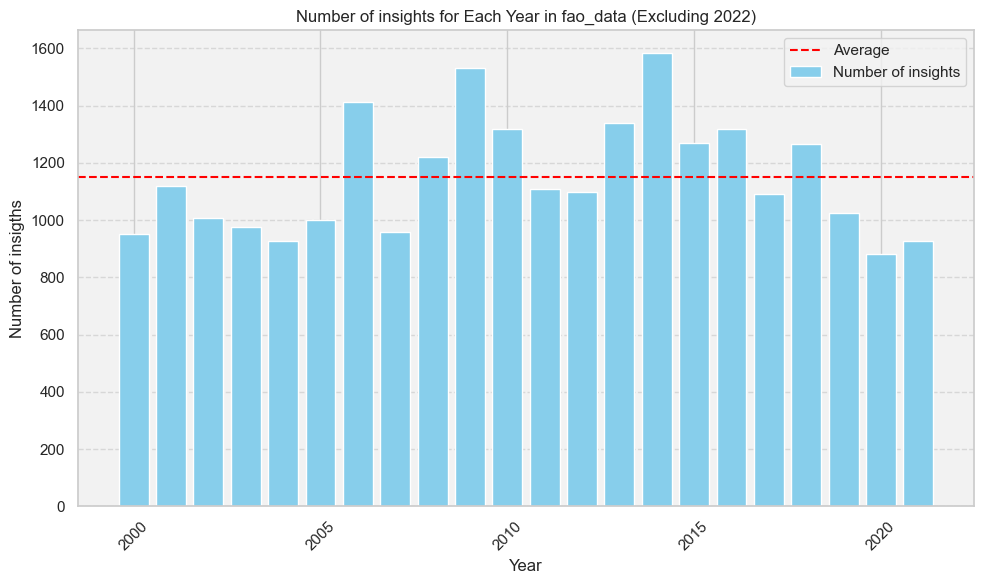

In [366]:
# Exclude 2022 from the data
filtered_data = fao_data[fao_data['year'] != 2022]

# Count the number of rows for each year
year_counts = filtered_data['year'].value_counts().sort_index()

# Calculate the average number of rows across all years
average_rows = year_counts.mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue', label='Number of insights')
plt.axhline(y=average_rows, color='red', linestyle='--', label='Average')
plt.title('Number of insights for Each Year in fao_data (Excluding 2022)')
plt.xlabel('Year')
plt.ylabel('Number of insigths')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Make it possible to display detailed information regarding each country and number of gruoups analyzed during a selected range of years

In [367]:
def show_recs_more_than(
    country='United States', 
    start_year=2000,
    end_year=2022
):
    """
    Display records for a given country and range of years.

    Parameters:
    country (str): The country for which to display records. Defaults to 'United States'.
    start_year (int): The starting year of the range of years to consider. Defaults to 2000.
    end_year (int): The ending year of the range of years to consider. Defaults to 2022.

    Returns:
    None
    """
    # Filter data for the specified country and range of years
    filtered_data = country_food_group[(country_food_group['country'] == country) & 
                                       (country_food_group['year'] >= start_year) &
                                       (country_food_group['year'] <= end_year)]
    
    # Display records for the specified country and years
    display(HTML(f'<h1>Records for {country} between {start_year} and {end_year}<h1>'))
    display(filtered_data.loc[:, ['year', 'num_groups', 'mean_loss_percentage']])
    
    # Calculate average and standard deviation of 'num_groups'
    avg_groups = filtered_data['num_groups'].mean()
    total_groups = filtered_data['num_groups'].sum()
    std_dev = filtered_data['num_groups'].std()
    
    # Calculate average loss food based on 'mean_loss_percentage'
    avg_loss_food = filtered_data['mean_loss_percentage'].mean() # Assuming 'loss_percentage' represents percentage
    
    # Display average and standard deviation of 'num_groups'
    display(HTML(f'<h2>Total number of groups analyzed: {total_groups:.2f}<h2>'))
    display(HTML(f'<h2>Average number of groups analyzed: {avg_groups:.2f}<h2>'))
    display(HTML(f'<h2>Standard Deviation: {std_dev:.2f}<h2>'))
    
    # Display average loss food
    display(HTML(f'<h2>Average loss food: {avg_loss_food:.2f}%<h2>'))

    return  # Add this line to prevent displaying the function signature

# Define min_year and max_year
min_year = country_food_group['year'].min()
max_year = country_food_group['year'].max()

# Create interactive widget
interact(show_recs_more_than,
         country=country_food_group['country'].unique(), 
         start_year=IntSlider(min=min_year, max=max_year, step=1, value=min_year),
         end_year=IntSlider(min=min_year, max=max_year, step=1, value=max_year))


interactive(children=(Dropdown(description='country', options=('Algeria', 'Angola', 'Argentina', 'Armenia', 'A…

<function __main__.show_recs_more_than(country='United States', start_year=2000, end_year=2022)>

### <u> 1.2- Visualize how many times a country has analized by the different groups of food through the years

Visualization using plots for the last 6 years

In [368]:
group_food_analysis = fao_data.groupby(['group', 'year']).agg(num_countries=('country', 'count'), mean_loss_percentage=('loss_percentage', 'mean')).reset_index()

In [369]:
group_food_analysis.head()

,group,year,num_countries,mean_loss_percentage
0,11,2000,862,2.748577
1,11,2001,875,2.989075
2,11,2002,870,2.756161
3,11,2003,858,2.706506
4,11,2004,861,2.741779


On each column, the number of countries that reported data on food loss for that group of food is displayed

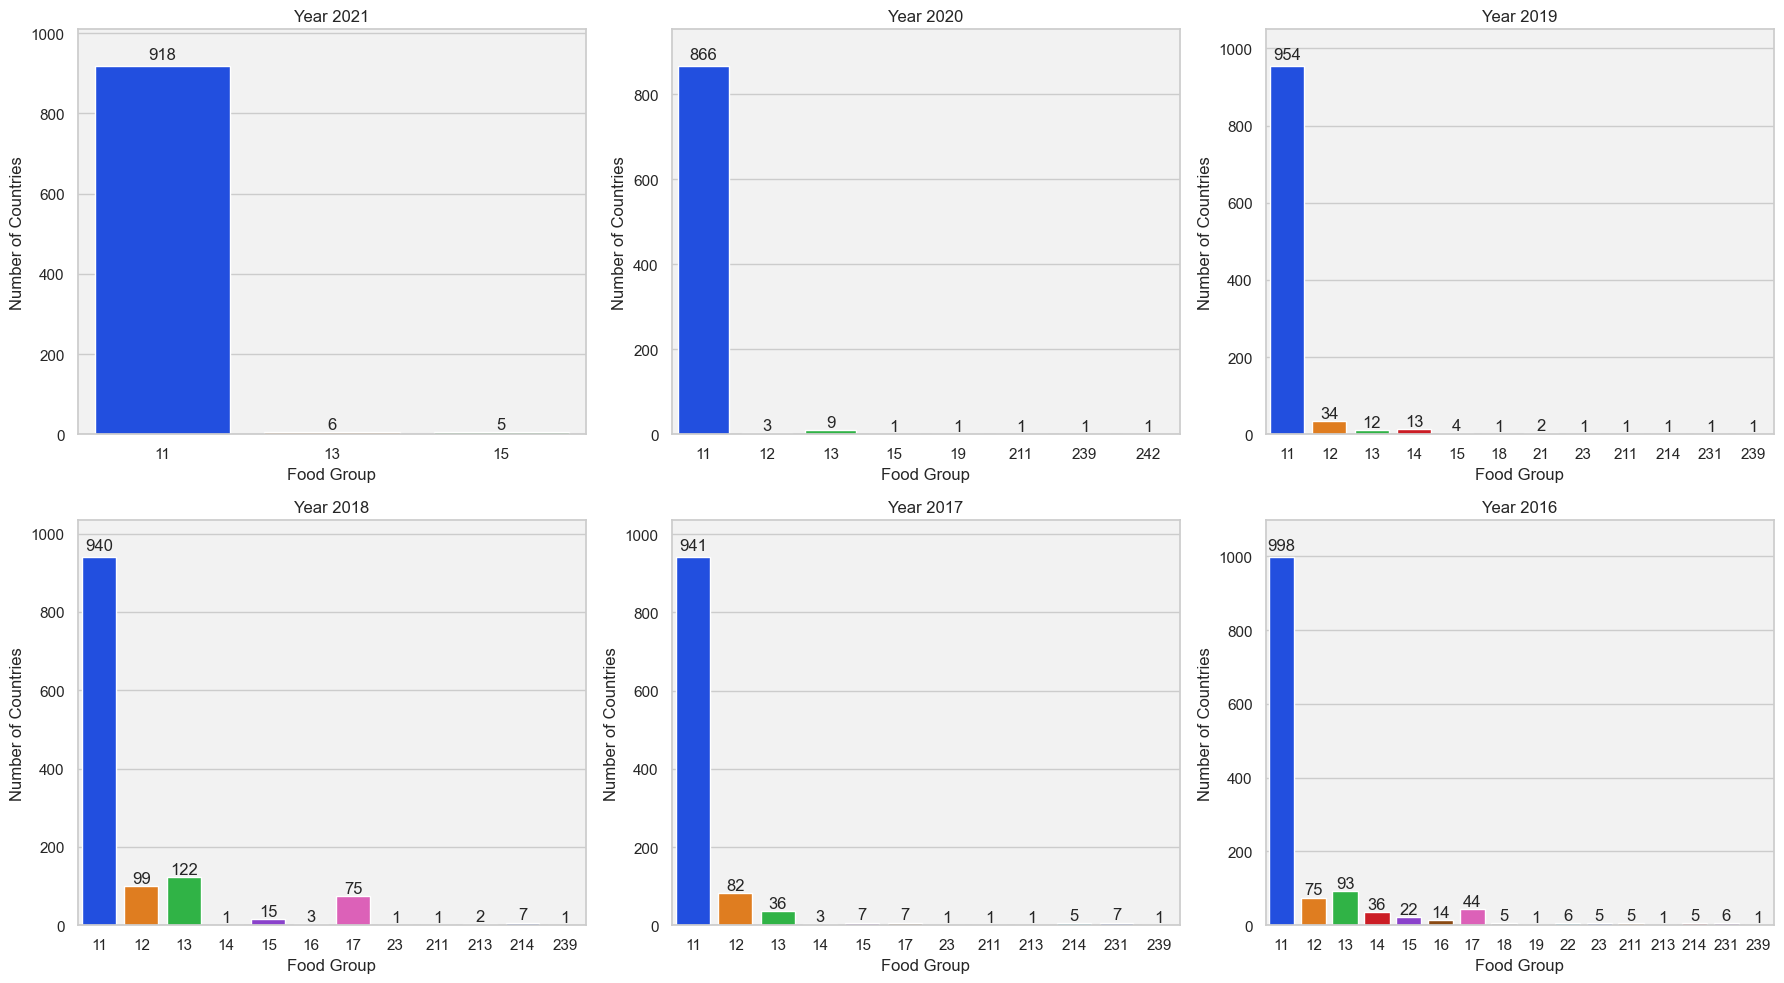

In [370]:
filtered_data = group_food_analysis[group_food_analysis['year'] < 2022]
unique_years = filtered_data['year'].unique()
unique_years = sorted(unique_years, reverse=True)

# Determine the number of subplots needed based on the number of unique years
num_subplots = min(len(unique_years), 6)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes for easy indexing
axes = axes.flatten()

# Iterate over unique years and create bar plots
for i, year in enumerate(unique_years[:num_subplots]):
    # Filter data for the current year
    year_data = filtered_data[filtered_data['year'] == year]
    
    # Plot bar plot
    sns.barplot(data=year_data, x='group', y='num_countries', ax=axes[i], palette='bright')
   
    # Set title for each subplot
    axes[i].set_title(f'Year {year}')
    
    # Set x-axis label
    axes[i].set_xlabel('Food Group')
    
    # Set y-axis label
    axes[i].set_ylabel('Number of Countries')
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x')
    
    # Set x-axis limits
    axes[i].set_xlim(-0.5, len(year_data['group']) - 0.5)
    
    # Set y-axis limits
    axes[i].set_ylim(0, max(year_data['num_countries']) * 1.1)
    
    # Add annotations to display the number of countries on each bar
    for bar in axes[i].patches:
        # Get the height of the bar
        height = bar.get_height()
        # Add text annotation above the bar
        axes[i].text(bar.get_x() + bar.get_width() / 2, height * 1.01, f'{height:.0f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

It is clear that, overwhelmingly, the most studied group is group 11, followed by 12 and 13, and finally 15 and 214. The following table shows th number of countries that studied thesee  grroup through the yearss As the difference between group 11 and the rest is very high we will plot all together and in another plot just the top 5 except group 11.


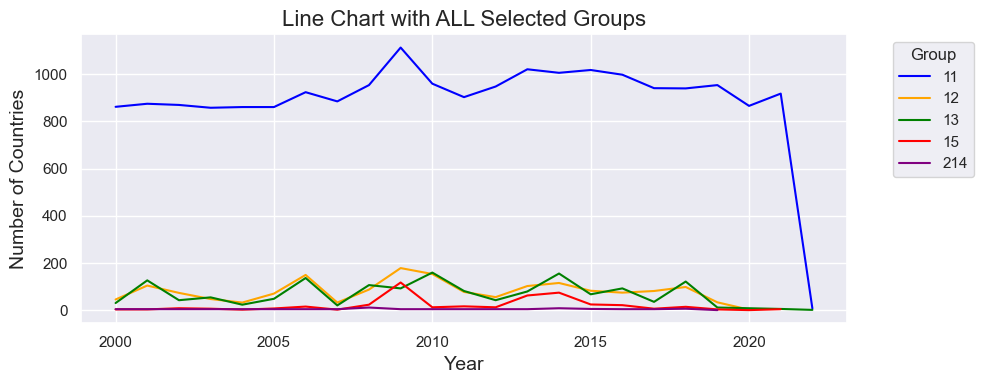

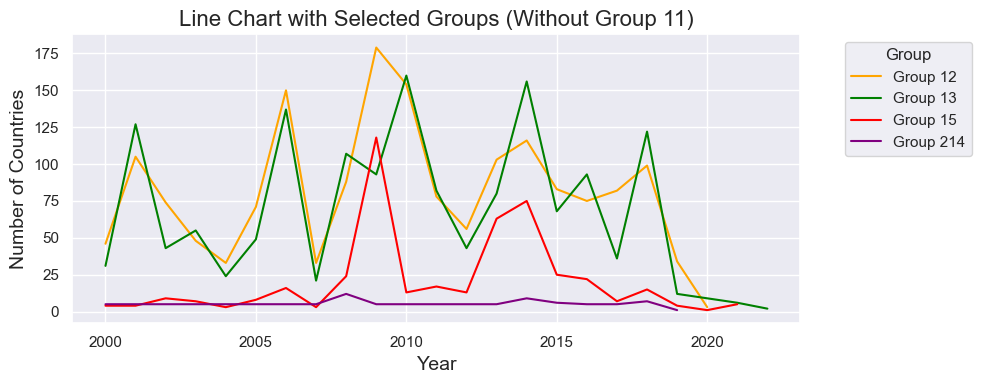

In [371]:
filtered_data = group_food_analysis[group_food_analysis['group'].isin([11, 12, 13, 15, 214])]
sns.set_style("whitegrid")
sns.set_theme()
color_palette = {11: 'blue', 12: 'orange', 13: 'green', 15: 'red', 214: 'purple'}
# Create the plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=filtered_data, x="year", y="num_countries", hue="group", palette=color_palette)
plt.title("Line Chart with ALL Selected Groups", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

sns.set_style("whitegrid")
sns.set_theme()
plt.figure(figsize=(10, 4))
for group, data in filtered_data.groupby('group'):
    if group != 11:
        plt.plot(data['year'], data['num_countries'], color=color_palette[group], label=f"Group {group}")
plt.title("Line Chart with Selected Groups (Without Group 11)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


Group 11 is quite stable through the years, all the others are quiet irregualar. To better undestand which is each group here they are its descriptions

In [372]:
pd.set_option('display.max_colwidth', None)
desired_groups = [ 11,12,13,15,214]
descriptions = fao_data[fao_data['group'].isin(desired_groups)][['group','description']].drop_duplicates()

In [373]:
descriptions

,group,description
6,11,Cereals
512,12,Vegetables
562,15,Edible roots and tubers with high starch or inulin content
593,13,Fruit and nuts
5924,214,Prepared and preserved fruit and nuts\n


It is clear that cereals group is the far more analyzed group.

### <u> 1.3- Food loss by food group.

The final step in the WHERE analysis is to visualize the average loss for each commodity over the years.

To start it is important to visualize the groups with the highest number of events yearly. As we know cereals is, by far, the one with most events we plot it separetly so we can  visualize the other years.

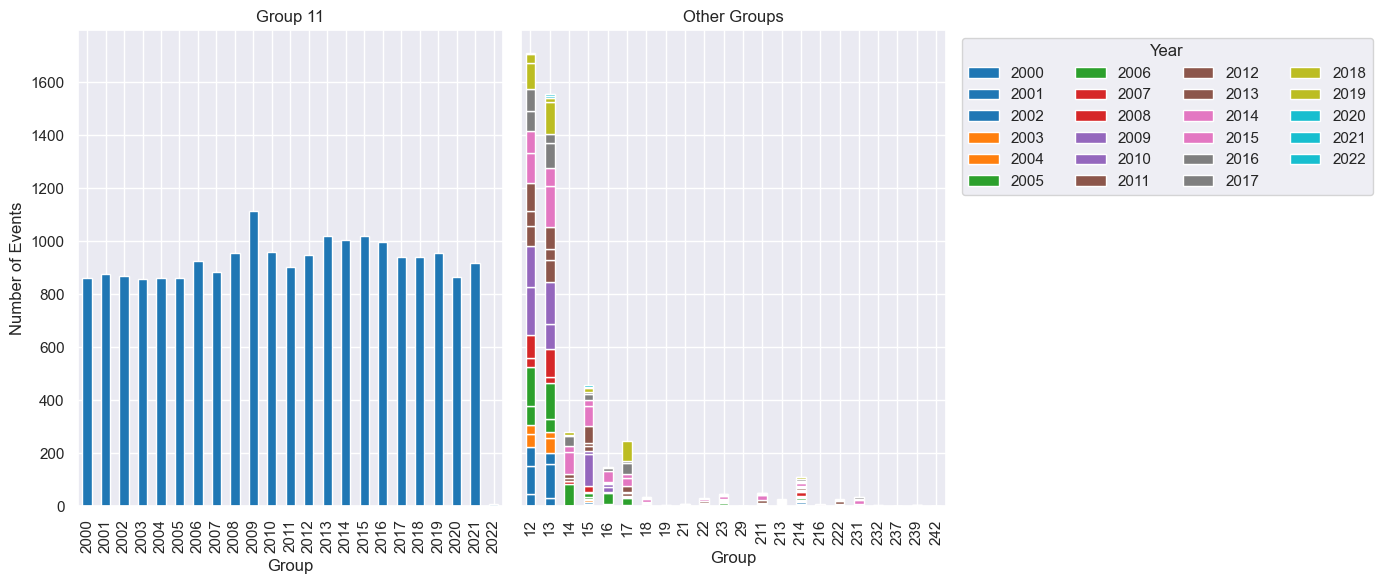

In [374]:
# Group by year and group, and count the number of events
grouped_data = fao_data.groupby(['year', 'group']).size().reset_index(name='count')

# Pivot the DataFrame to have years as columns
pivot_df = grouped_data.pivot(index='group', columns='year', values='count').fillna(0)

# Generate the bar plots for each group
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for group 11
pivot_df.loc[11].plot(kind='bar', stacked=True, cmap='tab10', ax=axs[0])
axs[0].set_title('Group 11')
axs[0].set_xlabel('Group')
axs[0].set_ylabel('Number of Events')


# Plot for other groups
other_groups_df = pivot_df.drop(11)
other_groups_df.plot(kind='bar', stacked=True, cmap='tab10', ax=axs[1])
axs[1].set_title('Other Groups')
axs[1].set_xlabel('Group')
axs[1].set_ylabel('Number of Events')

# Adjust legend for the second plot
axs[1].legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=4)

# Adjust layout
plt.tight_layout()
plt.show()


In [375]:
loss_by_group = fao_data[['year','country','group','loss_percentage']].groupby(['year','group']).aggregate({'country': 'count', 'loss_percentage':'mean'}).reset_index()

<Figure size 600x300 with 0 Axes>

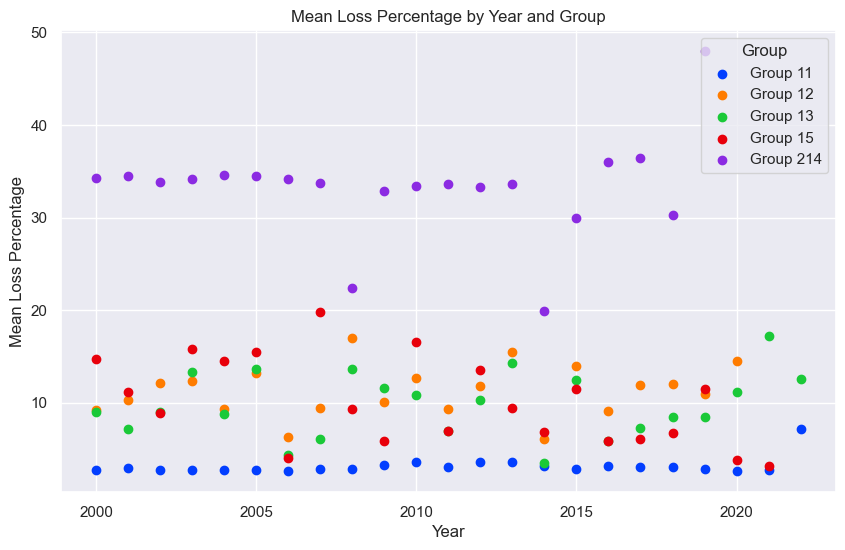

In [376]:
small_group = loss_by_group[loss_by_group['group'].isin([11,12,13,15,214])]
groups = small_group['group'].unique()
plt.figure(figsize= (6,3))
palette = sns.color_palette("bright", len(groups))

# Crear el scatter plot
plt.figure(figsize=(10, 6))
for group, color in zip(groups, palette):
    group_data = small_group[loss_by_group['group'] == group]
    plt.scatter(group_data['year'], group_data['loss_percentage'], label=f"Group {group}", color=color, marker='o')

plt.title('Mean Loss Percentage by Year and Group')
plt.xlabel('Year')
plt.ylabel('Mean Loss Percentage')
plt.legend(title='Group', loc = 'upper right')
plt.grid(True)
plt.show();

It is clear that the group with the highest loss percentage is 214 ('Prepared and preserved fruit and nuts'), and the one with the lowest is 11 ('Cereals').

Let's see what is the impact in total quantity of looses reported yearly

<Figure size 600x200 with 0 Axes>

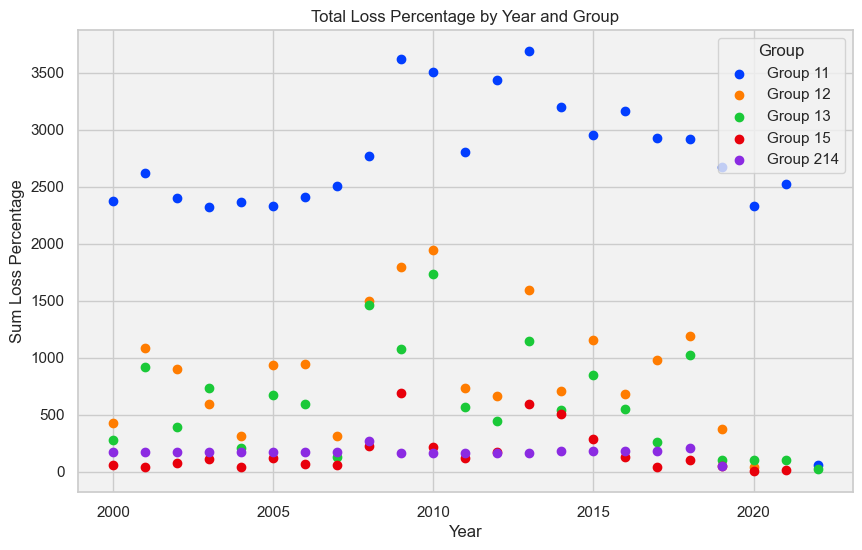

In [389]:
total_loss_group = fao_data[['year','country','group','loss_percentage']].groupby(['year','group']).aggregate({'country': 'count', 'loss_percentage':'sum'}).reset_index()
small_group_2 = total_loss_group[total_loss_group['group'].isin([11,12,13,15,214])]
groups = small_group_2['group'].unique()
plt.figure(figsize= (6,2))
palette = sns.color_palette("bright", len(groups))

# Crear el scatter plot
plt.figure(figsize=(10, 6))
for group, color in zip(groups, palette):
    group_data = small_group_2[loss_by_group['group'] == group]
    plt.scatter(group_data['year'], group_data['loss_percentage'], label=f"Group {group}", color=color, marker='o')

plt.title('Total Loss Percentage by Year and Group')
plt.xlabel('Year')
plt.ylabel('Sum Loss Percentage')
plt.legend(title='Group', loc = 'upper right')
plt.grid(True)
plt.show();

Although group 214 had a big percentaje the number of events is smaller so, it has lower impact. As expected, Cereals (group 11) despite having a low percentaje of loss, because of the number
of events is the one that has higher impact in loss food quantity

Going deeper in the cereals group which is the one with more impact (As Mixed grain has a very "strange" behabiour it will be removed from the plots)

In [378]:
print (f"in the 11 group (Cereals) we have {len(cereals_comm.commodity.unique())} commodities")

in the 11 group (Cereals) we have 11 commodities


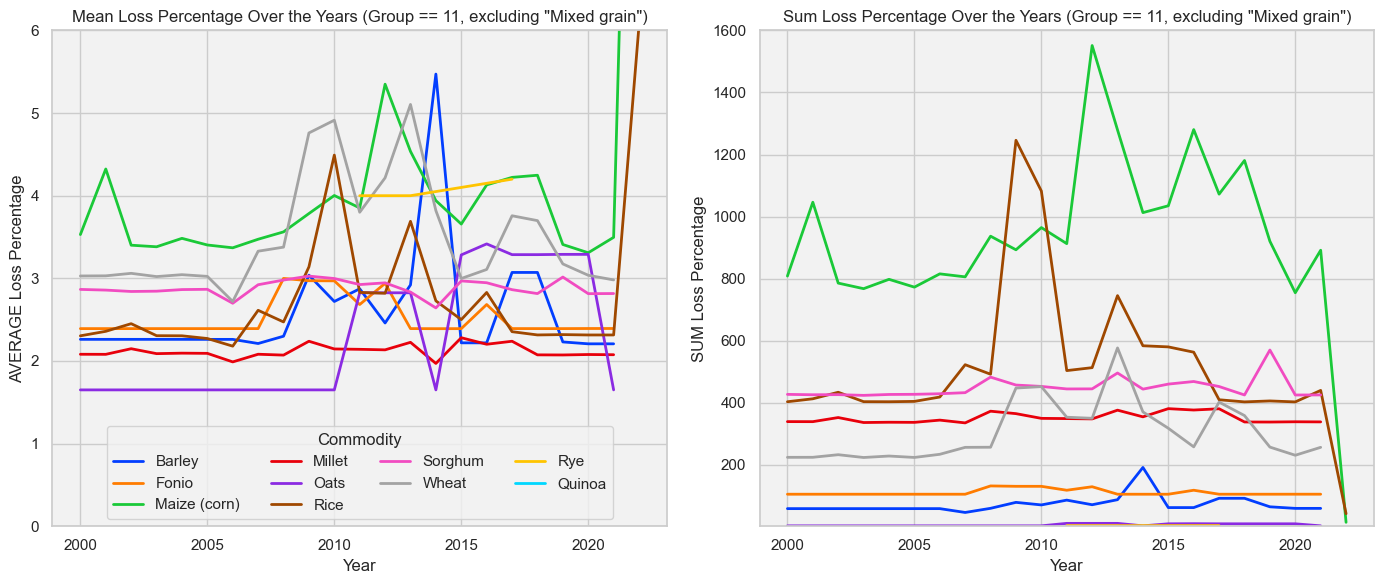

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Set palette to "bright"
sns.set_palette("bright")

# Set background color to a clear grey
sns.set_theme(style="whitegrid", palette="bright", rc={"axes.facecolor": ".95"})

# Filter the data
filtered_data = fao_data[(fao_data['group'] == 11) & (~fao_data['commodity'].str.contains('Mixed grain'))]

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot mean loss percentage
df1 = filtered_data[['year','commodity', 'loss_percentage']].groupby(['year', 'commodity']).aggregate({'loss_percentage': 'mean'})
sns.lineplot(data=df1, x='year', y='loss_percentage', hue='commodity', ax=axs[0], linewidth=2, ci=None)
axs[0].set_title('Mean Loss Percentage Over the Years (Group == 11, excluding "Mixed grain")')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('AVERAGE Loss Percentage')
axs[0].set_ylim(0, 6)
axs[0].legend(title='Commodity', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4)

# Plot sum loss percentage
df2 = filtered_data[['year','commodity', 'loss_percentage']].groupby(['year', 'commodity']).aggregate({'loss_percentage': 'sum'})
sns.lineplot(data=df2, x='year', y='loss_percentage', hue='commodity', ax=axs[1], linewidth=2, ci=None, legend=False)
axs[1].set_title('Sum Loss Percentage Over the Years (Group == 11, excluding "Mixed grain")')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('SUM Loss Percentage')
axs[1].set_ylim(2, 1600)

# Show the plots
plt.tight_layout()
plt.show()




Within the analysis of commodities within group 11 ('Cereals'), we do observe a correlation in both the average and total impact of corn which is the 

### <span style="color: darkblue;"><u>CONCLUSIONS:

<span style="color: darkblue;">**1-The average number of reports per year is slightly less than 1200 and has decreased in the last two complete years of the study (2021 and 2020), possibly due to the time it takes for certain countries to collect and report this type of information.**

<span style="color: darkblue;">**2- The group with the highest percentage of loss is the 214 ('Prepared and preserved fruit and nuts'), but, since it has fewer incidents, the overall volume of losses for this group is small.**

<span style="color: darkblue;">**3- The majority of food loss reports in the vast majority of countries correspond to group 11 (Cereals). Within the commodities of this group, maize is the one that accounts for the highest volume of losses.**






# <u> 2- WHEN:
In this second part of the study, the objective is to visualize at which stage in the process, between post-harvest and arrival at retailers, food loss occurs as well as the activity.

In [380]:
fao_data.food_supply_stage.unique()

array(['Storage', 'Harvest', 'Farm', nan, 'Post-harvest', 'Retail',
       'Wholesale', 'Trader', 'Whole supply chain', 'Processing',
       'Transport', 'Distribution', 'Households', 'Food Services',
       'Export', 'Pre-harvest', 'Market', 'Collector', 'Stacking',
       'Packing', 'Grading'], dtype=object)

First we will see which were the stages and activites reported in the dataframe:

In [381]:
print (f" reported stages = {fao_data['food_supply_stage'].unique()}\n"
       f"-----------------\n"
      f"reported activities = {fao_data.activity_1.unique()}, {fao_data.activity_2.unique()} ")

 reported stages = ['Storage' 'Harvest' 'Farm' nan 'Post-harvest' 'Retail' 'Wholesale'
 'Trader' 'Whole supply chain' 'Processing' 'Transport' 'Distribution'
 'Households' 'Food Services' 'Export' 'Pre-harvest' 'Market' 'Collector'
 'Stacking' 'Packing' 'Grading']
-----------------
reported activities = ['Storage' 'Drying' 'Shelling' 'Transportation' 'Winnowing' nan 'Farm'
 'Retailing' 'Wholesale' 'Collection' 'Processing' 'Harvesting' 'Cleaning'
 'Marketing' 'Distribution' 'Consumption' 'Handling' 'Grading' 'Threshing'
 'Sorting' 'Peeling' 'Stacking' 'Exporting' 'Manufacturing' 'Trading'
 'Packaging' 'Preservation' 'Milling' 'Sifting' 'Grating' 'Roasting'
 'Dewatering' 'Assembling' 'Loading' 'Bagging' 'Ripening' 'Lifting'
 'Curing' 'Parboiling' 'Bundling' 'Piling' 'Blanching' 'Layering'
 'Bulking'], [nan 'Harvesting' 'Threshing' 'Marketing' 'Ripening' 'Collection' 'Farm'
 'Wholesale' 'Sorting' 'Storage' 'Trading' 'Handling' 'Processing'
 'Transportation' 'Unloading' 'Packaging' 'Gradi

### <u> 2.1- Visualize the different stages recurrency :
- through the years
- by food group
- by country


Firs visual will let us see the overall stage with more reports and the one with highest volume of food loss

In [382]:
stages_df = fao_data[['year', 'country', 'group', 'food_supply_stage','loss_percentage']]

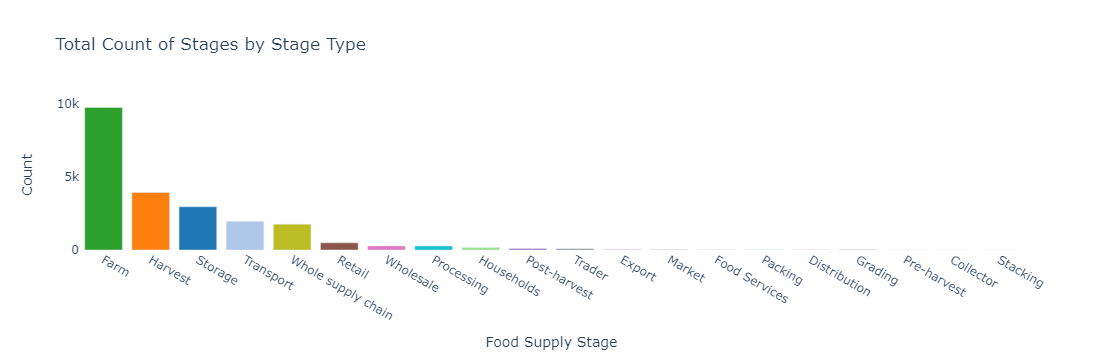

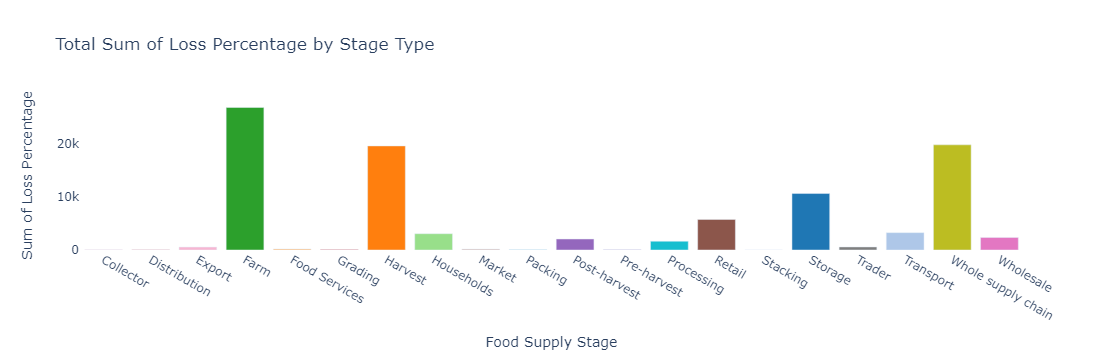

In [383]:
color_palette = {
    'Storage': '#1f77b4', 'Harvest': '#ff7f0e', 'Farm': '#2ca02c', 'nan': '#d62728', 
    'Post-harvest': '#9467bd', 'Retail': '#8c564b', 'Wholesale': '#e377c2', 'Trader': '#7f7f7f', 
    'Whole supply chain': '#bcbd22', 'Processing': '#17becf', 'Transport': '#aec7e8', 
    'Distribution': '#ff9896', 'Households': '#98df8a', 'Food Services': '#ffbb78', 
    'Export': '#f7b6d2', 'Pre-harvest': '#c5b0d5', 'Market': '#c49c94', 'Collector': '#f2b4c6', 
    'Stacking': '#dbdb8d', 'Packing': '#9edae5', 'Grading': '#d62728'
}

# Aggregate data to get total count of stages per stage type
count_per_stage_type = stages_df['food_supply_stage'].value_counts().reset_index()
count_per_stage_type.columns = ['food_supply_stage', 'count']

# Aggregate data to get total sum of loss percentage per stage type
sum_loss_per_stage_type = stages_df.groupby('food_supply_stage')['loss_percentage'].sum().reset_index()

# Create the first bar plot to show the total count of stages per stage type
fig1 = px.bar(count_per_stage_type, x='food_supply_stage', y='count', title='Total Count of Stages by Stage Type',
              color='food_supply_stage', color_discrete_map=color_palette)
fig1.update_layout(xaxis_title='Food Supply Stage', yaxis_title='Count', plot_bgcolor='white', showlegend=False)
fig1.update_layout(width=int(900))

# Create the second bar plot to show the total sum of loss percentage per stage type
fig2 = px.bar(sum_loss_per_stage_type, x='food_supply_stage', y='loss_percentage', 
              title='Total Sum of Loss Percentage by Stage Type', color='food_supply_stage', 
              color_discrete_map=color_palette)
fig2.update_layout(xaxis_title='Food Supply Stage', yaxis_title='Sum of Loss Percentage', plot_bgcolor='white', showlegend=False)
fig2.update_layout(width=int(900))

# Show the parallel bar plots
fig1.show()
fig2.show()

Second visual will let us see the frequency of each stage through the years or by group by changing the selected value.

In [384]:
color_palette = {
    'Storage': '#1f77b4', 'Harvest': '#ff7f0e', 'Farm': '#2ca02c', 'nan': '#d62728', 
    'Post-harvest': '#9467bd', 'Retail': '#8c564b', 'Wholesale': '#e377c2', 'Trader': '#7f7f7f', 
    'Whole supply chain': '#bcbd22', 'Processing': '#17becf', 'Transport': '#aec7e8', 
    'Distribution': '#ff9896', 'Households': '#98df8a', 'Food Services': '#ffbb78', 
    'Export': '#f7b6d2', 'Pre-harvest': '#c5b0d5', 'Market': '#c49c94', 'Collector': '#f2b4c6', 
    'Stacking': '#dbdb8d', 'Packing': '#9edae5', 'Grading': '#d62728'
}

@interact
def scatter_plot(x_axis=['year', 'group']):
    if x_axis == 'year':
        # Aggregate data to get count of occurrences of each food supply stage for each year
        count_per_x_stage = stages_df.groupby(['year', 'food_supply_stage']).size().reset_index(name='count')
        x_label = 'Year'
        x_values = 'year'
    else:
        # Aggregate data to get count of occurrences of each food supply stage for each group
        count_per_x_stage = stages_df.groupby(['group', 'food_supply_stage']).size().reset_index(name='count')
        x_label = 'Group'
        x_values = 'group'
    
    # Create scatter plot
    fig = px.scatter(count_per_x_stage, x=x_values, y='food_supply_stage', size='count',
                     color='food_supply_stage', hover_name='food_supply_stage', hover_data={'count': True},
                     labels={x_values: x_label, 'food_supply_stage': 'Food Supply Stage', 'count': 'Count'},
                     color_discrete_map=color_palette,
                     title=f'Food Supply Stage Count per {x_label}')

    # Update layout
    fig.update_layout(yaxis=dict(title=None))  # Remove y-axis label
    fig.update_layout(legend=dict(orientation='v', traceorder='normal', bgcolor='rgba(0,0,0,0)',
                                  bordercolor='rgba(0,0,0,0)', borderwidth=0, x=1.02, y=1,
                                  xanchor='left', yanchor='top', itemsizing='constant',
                                  itemwidth=50, tracegroupgap=10))  # Divide legend into two columns and set constant size for legend marks
    
    # Show plot
    fig.show()


interactive(children=(Dropdown(description='x_axis', options=('year', 'group'), value='year'), Output()), _dom…

It is clear that in the overall computation, the greatest weight, both in terms of the number of incidents and the amount of food loss it represents, lies in the 'Farm' stage. Secondly, in terms of frequency, the stage with the most importance would be 'Harvest', but in terms of loss quantity, it would be the 'Whole Supply Chain'. The values of 'Sum of Loss Percentage' should be interpreted not as an absolute value with its own meaning, but as a comparative reference, as we are summing percentages over time.


As this study includes more than 100 countries, none of the previous visualizations was suitable for viewing the variation of stages by country. The following three visualizations allow us to delve deeper into the frequency of each stage in the reports by year, by food group, or by country and year.

In [385]:
# Get unique group values
unique_groups = stages_df['group'].unique()

@interact
def plot_by_year(year=(2000, 2022)):
    # Filter DataFrame based on selected year
    year_filtered_df = stages_df[stages_df['year'] == year]
    
    # Count occurrences of each food supply stage for the selected year
    year_counts = year_filtered_df['food_supply_stage'].value_counts()
    
    # Create figure for the plot with year slicer
    fig_year = go.Figure()
    fig_year.add_trace(go.Bar(x=year_counts.index, y=year_counts.values,
                               marker_color='blue'))
    fig_year.update_layout(title=f'Count of Food Supply Stage for Year {year}',
                           xaxis_title='Food Supply Stage',
                           yaxis_title='Count',
                           width=700, height=400)  # Adjust the size of the plot
    
    # Plot the figure
    fig_year.show()


interactive(children=(IntSlider(value=2011, description='year', max=2022, min=2000), Output()), _dom_classes=(…

In [386]:
# Get unique group values
unique_groups = stages_df['group'].unique()

@interact
def plot_by_group(group=unique_groups):
    # Filter DataFrame based on selected group
    group_filtered_df = stages_df[stages_df['group'] == group]
    
    # Count occurrences of each food supply stage for the selected group
    group_counts = group_filtered_df['food_supply_stage'].value_counts()
    
    # Create figure for the plot with group slicer
    fig_group = go.Figure()
    fig_group.add_trace(go.Bar(x=group_counts.index, y=group_counts.values,
                                marker_color='green'))
    fig_group.update_layout(title=f'Count of Food Supply Stage for Group {group}',
                            xaxis_title='Food Supply Stage',
                            yaxis_title='Count',
                            width=700, height=400)  # Adjust the size of the plot
    
    # Plot the figure
    fig_group.show()


interactive(children=(Dropdown(description='group', options=(231, 11, 12, 17, 15, 13, 211, 29, 16, 222, 22, 23…

In [387]:
# Get unique countries sorted alphabetically
unique_countries_sorted = sorted(stages_df['country'].unique())

@interact
def plot_by_year_and_country(start_year=(2000, 2022), end_year=(2000, 2022), country=unique_countries_sorted):
    # Filter DataFrame based on selected years and country
    year_filtered_df = stages_df[(stages_df['year'] >= start_year) & (stages_df['year'] <= end_year) & (stages_df['country'] == country)]
    
    # Count occurrences of each food supply stage for the selected years and country
    year_counts = year_filtered_df['food_supply_stage'].value_counts()
    
    # Create figure for the plot
    fig = go.Figure()
    fig.add_trace(go.Bar(x=year_counts.index, y=year_counts.values, marker_color='blue'))
    fig.update_layout(title=f'Count of Food Supply Stage for {country} from {start_year} to {end_year}',
                      xaxis_title='Food Supply Stage', yaxis_title='Count',
                      width=700, height=400)  # Adjust the size of the plot
    
    # Show the plot
    fig.show()


interactive(children=(IntSlider(value=2011, description='start_year', max=2022, min=2000), IntSlider(value=201…

It could be interesting to visualize the number of countries reporting each stage for the through the years

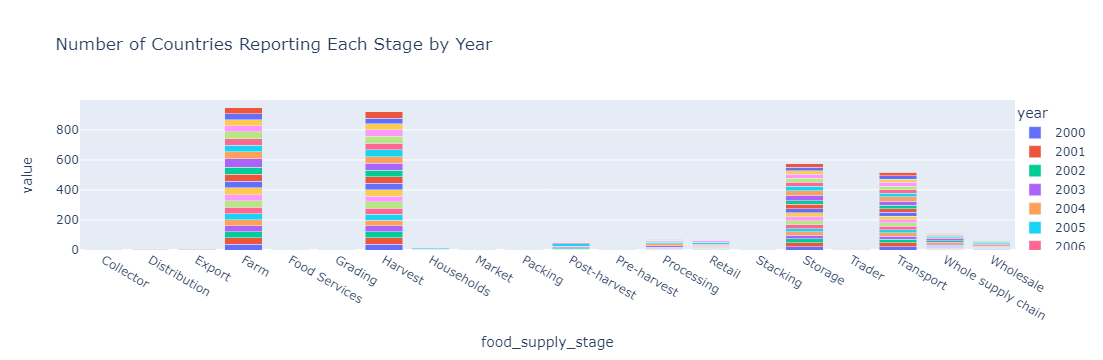

In [388]:
import pandas as pd
import plotly.express as px

# Group by stages and years, and count the number of unique countries reporting each stage for each year
stage_counts = stages_df.groupby(['year', 'food_supply_stage']).agg({'country': 'nunique'}).reset_index()

# Pivot the data to create a table suitable for plotting
pivot_stage_counts = stage_counts.pivot(index='food_supply_stage', columns='year', values='country').fillna(0)

# Create the stacked bar plot
fig = px.bar(pivot_stage_counts, x=pivot_stage_counts.index, y=pivot_stage_counts.columns,
             title='Number of Countries Reporting Each Stage by Year',
             labels={'x': 'Food Supply Stage', 'y': 'Num. Countries'},
             barmode='stack')

# Set plot width to 1000
fig.update_layout(width=1000)

# Show legend in two columns
fig.update_layout(legend=dict(x=1.0, y=1.0, orientation='v', bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'))

# Show the plot
fig.show()


We can see that the distribution of each stage over the years is consistent, and the four stages with the most weight are 'Farm', 'Harvest', 'Storage', and 'Transport'

### <u> 2.2- Visualize the different activities :



In [399]:
activities_df = fao_data[['year', 'country', 'loss_percentage', 'group', 'food_supply_stage', 'activity_1', 'activity_2']]

First, let's visualize the top 10 activities 

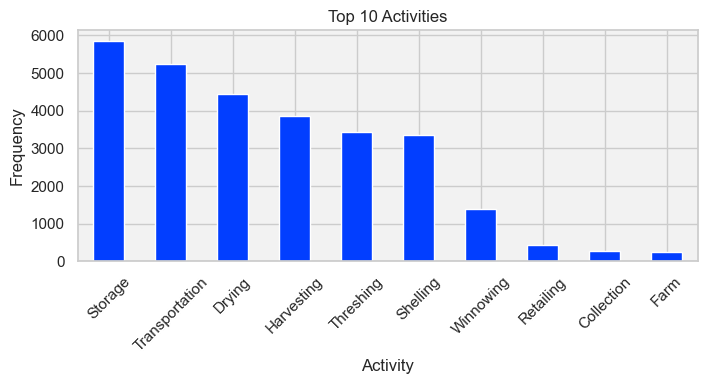

In [403]:
# Combine values from both columns into a single series
activities_series = pd.concat([activities_df['activity_1'], activities_df['activity_2']])

# Count the occurrences of each activity
top_activities = activities_series.value_counts().head(10)

# Plot the top 10 activities
plt.figure(figsize=(8, 3))
top_activities.plot(kind='bar')
plt.title('Top 10 Activities')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [411]:
print (f"the top 10 activities are:\n {top_activities}")

the top 10 activities are:
 Storage           5844
Transportation    5227
Drying            4441
Harvesting        3845
Threshing         3441
Shelling          3358
Winnowing         1388
Retailing          441
Collection         263
Farm               243
Name: count, dtype: int64


Let's calculate the percentage that each of these activities represents in the total number of reports for each year.

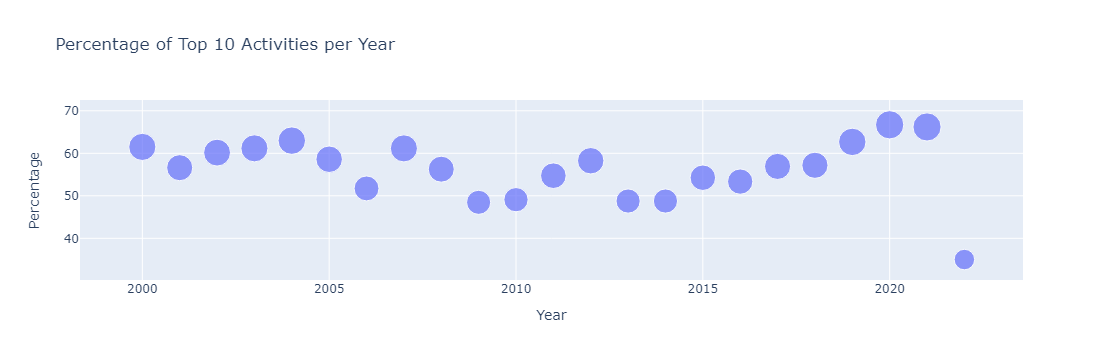

In [433]:
import plotly.express as px

# Define las top 10 actividades
top_activities = ['Storage', 'Transportation', 'Drying', 'Harvesting', 'Threshing', 'Shelling', 'Winnowing', 'Retailing', 'Collection', 'Farm']

# Combina las dos columnas de actividades en una sola serie
activities_series = pd.concat([activities_df['activity_1'], activities_df['activity_2']])

# Calcula el porcentaje que cada actividad representa en el total de actividades reportadas por año
activities_percentage = activities_series.groupby(activities_df['year']).apply(lambda x: x.isin(top_activities).mean() * 100).reset_index(name='percentage')

# Crea el gráfico de dispersión
fig = px.scatter(activities_percentage, x='year', y='percentage', size='percentage',
                 hover_data={'percentage': True},
                 labels={'year': 'Year', 'percentage': 'Percentage'},
                 title='Percentage of Top 10 Activities per Year')

# Muestra el gráfico
fig.show()


## activities_df.sample()